<a href="https://colab.research.google.com/github/Worlddatascience/DataScienceCohort/blob/master/9_How_to_Backtest_a_Relative_Strength_index_Strategy%C2%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anade Davis - Financial Data Scientist - [Linkedin](https://https://www.linkedin.com/in/anadedatascientist/)

**This Model I will be Backtesting the Relative Strenght Index Strategy Investors use with the EOS (Eaton Vance Enhanced Equity Income Fund)**

"The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset." ~ [Source](https://www.investopedia.com/terms/r/rsi.asp)

References:

https://github.com/PacktPublishing/Python-for-Finance-Cookbook/blob/master/Chapter%2002/chapter_2.ipynb

https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab

In [1]:
!pip install backtrader #Code to Install Backtrader

In [2]:
pip install yfinance #Code to install yfinance

In [3]:
from datetime import datetime
import backtrader as bt

In [4]:
class RsiSignalStrategy(bt.SignalStrategy):
    params = dict(rsi_periods=14, rsi_upper=70, 
                  rsi_lower=30, rsi_mid=50)

    def __init__(self):
        
        # add RSI indicator
        rsi = bt.indicators.RSI(period=self.p.rsi_periods,
                                upperband=self.p.rsi_upper,
                                lowerband=self.p.rsi_lower)

        # add RSI from TA-lib just for reference 
        bt.talib.RSI(self.data, plotname='TARSI')
    
        # long condition (with exit)
        rsi_signal_long = bt.ind.CrossUp(rsi, self.p.rsi_lower, plot=False)
        self.signal_add(bt.SIGNAL_LONG, rsi_signal_long)
        self.signal_add(bt.SIGNAL_LONGEXIT, -(rsi > self.p.rsi_mid))

        # short condition (with exit)
        rsi_signal_short = -bt.ind.CrossDown(rsi, self.p.rsi_upper, plot=False)
        self.signal_add(bt.SIGNAL_SHORT, rsi_signal_short)
        self.signal_add(bt.SIGNAL_SHORTEXIT, rsi < self.p.rsi_mid)

In [5]:
#The code to pull data from Yahoo Finance API
EOSSTOCK= bt.feeds.YahooFinanceData(dataname='EOS',fromdate=datetime(2018, 9, 30),todate=datetime(2020, 9, 30))
#We look at EOS returns over a year

In [6]:
cerebro = bt.Cerebro(stdstats = False)
cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(EOSSTOCK)
cerebro.broker.setcash(100000.0)
#cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)


In [7]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib


(Reading database ... 144645 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [8]:

cerebro.run()


<IPython.core.display.Javascript object>

[[<Figure size 1152x648 with 4 Axes>]]

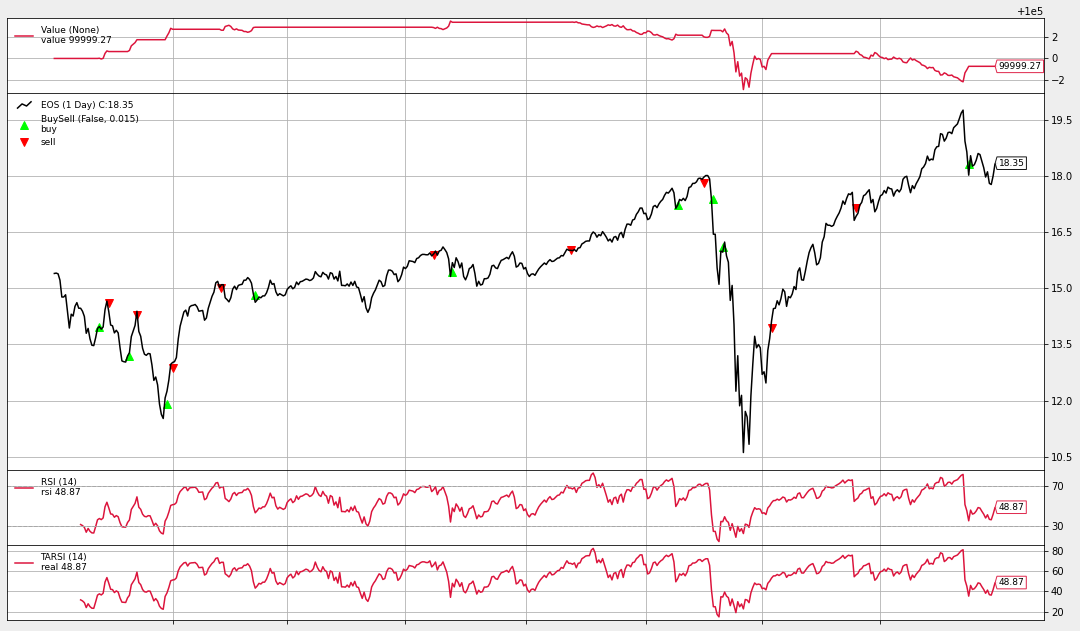

In [9]:
#This entire code block is needed to display Simple Moving Average plots
#This otherwise would not take so much code but it seems to only work in Google Colab this way
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams #Creates parameters for our plot
rcParams['figure.figsize'] = 16,9 #size
rcParams['figure.facecolor'] = '#eeeeee' #Color scheme
plt.plot() #The Plot Code
plt.close()
cerebro.plot(iplot=True, volume=False)

This is a week Strategy that caused us to lose money! This would be a Strategy I would not use going forward!